In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
vol_score = pd.read_csv('vol_score.csv')
vol_score = vol_score.drop(vol_score.columns[0], axis = 1)
vol_score

,sender_name,sum_return,total_waybill,perc_return,active_months,avg_vol_month,avg_vol_month_log,vol_standard_scaler,vol_score_v2,avg_vol_month_norm
0,TnT Beauty Shop,573,1722369,0.000333,14,123026.357143,11.720154,12.299772,99.990856,602.516585
1,SOMETHINC Official Shop,84,365160,0.000230,8,45645.000000,10.728649,11.133386,99.970651,223.514971
2,Purbasari Official Store,79,159982,0.000494,8,19997.750000,9.903375,10.162550,99.922552,97.898808
3,Aladin Bank,3187,154845,0.020582,6,25807.500000,10.158420,10.462580,99.942616,126.354042
4,Ace Fashion Official Shop,80,130363,0.000614,15,8690.866667,9.070028,9.182218,99.793842,42.519487
...,...,...,...,...,...,...,...,...,...,...
667215,SitiAmiarti13,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
667216,Siti. Maryam,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
667217,Siti-BeningOlshop,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
667218,Siti zulaika,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102


In [3]:
chs_seller = pd.read_csv('chs_seller.csv')
chs_seller = chs_seller.drop(chs_seller.columns[0], axis = 1)
chs_seller

,sender_name,frequency,frequency_month,frequency_week,recency,recency_month,recency_week,T,T_month,T_week,monetary_value,monetary_value_month,monetary_value_week,predict_purch_3,predict_purch_6,predict_purch_9,predict_purch_12,prob_alive,prob_alive_adj
0,ANINDITA NURMAULIDA,0,0,0,0,0,0,313,10,45,0.000000,0.000000e+00,0.000000,0.101029,0.196319,0.286592,0.372429,1.000000,0.100000
1,Rurri Handalusia,0,0,0,0,0,0,328,10,47,0.000000,0.000000e+00,0.000000,0.101029,0.196319,0.286592,0.372429,1.000000,0.090000
2,KISTO HSS,0,0,0,0,0,0,97,3,14,0.000000,0.000000e+00,0.000000,0.245952,0.461228,0.653442,0.827490,1.000000,0.310000
3,namora_store28,0,0,0,0,0,0,332,11,48,0.000000,0.000000e+00,0.000000,0.093191,0.181469,0.265412,0.345491,1.000000,0.090000
4,Ayunda Amalia,0,0,0,0,0,0,105,3,15,0.000000,0.000000e+00,0.000000,0.245952,0.461228,0.653442,0.827490,1.000000,0.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667216,NWZ Store,264,14,59,449,14,65,451,14,65,57239.516226,1.011231e+06,252807.863333,2.329545,4.260354,5.892465,7.294101,0.925652,0.925652
667217,Yurisa Store,116,14,47,425,14,60,442,14,63,33688.658120,2.627715e+05,82116.104167,2.329545,4.260354,5.892465,7.294101,0.925652,0.925652
667218,eightavenue,271,14,60,447,14,64,451,14,65,128872.856618,2.336894e+06,574646.180328,2.329545,4.260354,5.892465,7.294101,0.925652,0.925652
667219,PutriSantriShops,76,14,39,447,14,63,450,14,64,35012.636364,1.797315e+05,67399.325000,2.329545,4.260354,5.892465,7.294101,0.925652,0.925652


In [4]:
seller_score = chs_seller.merge(vol_score, how = 'inner', on = 'sender_name')
seller_score

,sender_name,frequency,frequency_month,frequency_week,recency,recency_month,recency_week,T,T_month,T_week,...,prob_alive_adj,sum_return,total_waybill,perc_return,active_months,avg_vol_month,avg_vol_month_log,vol_standard_scaler,vol_score_v2,avg_vol_month_norm
0,ANINDITA NURMAULIDA,0,0,0,0,0,0,313,10,45,...,0.100000,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
1,Rurri Handalusia,0,0,0,0,0,0,328,10,47,...,0.090000,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
2,KISTO HSS,0,0,0,0,0,0,97,3,14,...,0.310000,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
3,namora_store28,0,0,0,0,0,0,332,11,48,...,0.090000,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
4,Ayunda Amalia,0,0,0,0,0,0,105,3,15,...,0.290000,0,1,0.000000,1,1.000000,0.000000,-1.487578,1.112274,-0.042102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667219,NWZ Store,264,14,59,449,14,65,451,14,65,...,0.925652,1,640,0.001563,15,42.666667,3.753418,2.927866,48.197434,0.161975
667220,Yurisa Store,116,14,47,425,14,60,442,14,63,...,0.925652,0,201,0.000000,15,13.400000,2.595255,1.565426,19.238708,0.018631
667221,eightavenue,271,14,60,447,14,64,451,14,65,...,0.925652,0,740,0.000000,15,49.333333,3.898600,3.098655,52.464383,0.194627
667222,PutriSantriShops,76,14,39,447,14,63,450,14,64,...,0.925652,0,140,0.000000,15,9.333333,2.233592,1.139974,13.470003,-0.001287


In [5]:
import scipy.stats

scipy.stats.pearsonr(seller_score.prob_alive_adj, seller_score.vol_score_v2)

PearsonRResult(statistic=0.05785141937539669, pvalue=0.0)

In [6]:
seller_score['seller_score'] = (seller_score['vol_score_v2']*0.65) + (seller_score['prob_alive_adj']*35) - (seller_score['perc_return']*100/2)
seller_score = seller_score[['sender_name', 'vol_score_v2', 'prob_alive_adj', 'perc_return', 'seller_score', 'avg_vol_month', 'frequency_month']]

In [7]:
df_1 = seller_score.iloc[:333613,:]
df_2 = seller_score.iloc[333613:,:]
# seller_score.to_csv('seller_score.csv', index = False)

In [8]:
seller_score.to_csv('seller_score.csv', index = False)

In [9]:
seller_score

,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month
0,ANINDITA NURMAULIDA,1.112274,0.100000,0.000000,4.222978,1.000000,0
1,Rurri Handalusia,1.112274,0.090000,0.000000,3.872978,1.000000,0
2,KISTO HSS,1.112274,0.310000,0.000000,11.572978,1.000000,0
3,namora_store28,1.112274,0.090000,0.000000,3.872978,1.000000,0
4,Ayunda Amalia,1.112274,0.290000,0.000000,10.872978,1.000000,0
...,...,...,...,...,...,...,...
667219,NWZ Store,48.197434,0.925652,0.001563,63.648010,42.666667,14
667220,Yurisa Store,19.238708,0.925652,0.000000,44.902963,13.400000,14
667221,eightavenue,52.464383,0.925652,0.000000,66.499652,49.333333,14
667222,PutriSantriShops,13.470003,0.925652,0.000000,41.153305,9.333333,14


In [10]:
print(seller_score.isnull().any())

sender_name         True
vol_score_v2       False
prob_alive_adj     False
perc_return        False
seller_score       False
avg_vol_month      False
frequency_month    False
dtype: bool


In [11]:
seller_score_clean = seller_score.loc[~seller_score.isnull().any(axis = 1)]

In [12]:
seller_score_clean = seller_score_clean.reset_index(drop= True)

In [13]:
seller_score_clean.loc[seller_score_clean.isnull().any(axis = 1)]

,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month


In [14]:
print(seller_score_clean.isnull().any())

sender_name        False
vol_score_v2       False
prob_alive_adj     False
perc_return        False
seller_score       False
avg_vol_month      False
frequency_month    False
dtype: bool


In [15]:
seller_score_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667218 entries, 0 to 667217
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sender_name      667218 non-null  object 
 1   vol_score_v2     667218 non-null  float64
 2   prob_alive_adj   667218 non-null  float64
 3   perc_return      667218 non-null  float64
 4   seller_score     667218 non-null  float64
 5   avg_vol_month    667218 non-null  float64
 6   frequency_month  667218 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 35.6+ MB


In [16]:
seller_score_clean.to_csv('seller_score.csv', index = False)

In [17]:
seller_score_clean = seller_score[(seller_score['frequency_month']!= 0) & (seller_score['avg_vol_month_log']!= 0)]
seller_score_clean

KeyError: 'avg_vol_month_log'

<AxesSubplot: xlabel='seller_score', ylabel='Density'>

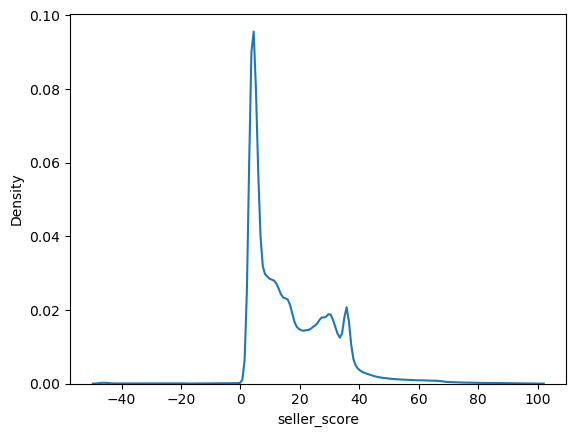

In [18]:
sns.kdeplot(data = seller_score_clean, x = 'seller_score')

In [19]:
seller_score_clean[(seller_score['vol_score_v2']>= 90) & 
             (seller_score['prob_alive_adj']>= 0.9) &
            (seller_score['perc_return']<= 0.05)].sort_values(by = 'seller_score', ascending = False)

/var/folders/10/27vsnb7n2ss4v478b3wpdnxw0000gn/T/ipykernel_10879/1638433355.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seller_score_clean[(seller_score['vol_score_v2']>= 90) &


,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month
273043,SEMAR NUSANTARA MAJAPAHIT,98.822815,1.000000,0.000000,99.234830,1960.0,0
321578,Pualam Store,98.073257,1.000000,0.000781,98.708585,1281.0,0
139359,cqshamperam,97.954027,1.000000,0.000000,98.670118,1216.0,0
65815,Pyary Official BPOM,96.927658,1.000000,0.000000,98.002978,853.0,0
35148,LAPAKPOPULER,97.420609,1.000000,0.011066,97.770076,994.0,0
...,...,...,...,...,...,...,...
649652,AGANISBOOK,3.345476,0.557640,0.000000,21.691949,2.6,9
650952,Ika olshop,5.735801,0.365881,0.000000,16.534091,4.2,9
652100,BAJU COUPLE BATIK KELUARGA,5.735801,0.365881,0.000000,16.534091,4.2,9
652985,Srik Shops,3.054022,0.365881,0.000000,14.790934,2.4,9


In [20]:
seller_score_clean[(seller_score['vol_score_v2']>= 90) & 
             (seller_score['prob_alive_adj']< 0.5) &
            (seller_score['perc_return']<= 0.05)].sort_values(by = 'seller_score', ascending = False)

/var/folders/10/27vsnb7n2ss4v478b3wpdnxw0000gn/T/ipykernel_10879/4177864529.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seller_score_clean[(seller_score['vol_score_v2']>= 90) &


,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month
582564,NAOMI LOE SHOP,94.586762,0.866645,0.000775,91.775234,516.200000,4
650720,Vican Indonesia Official,89.953328,0.904530,0.001368,90.059810,292.400000,9
632758,davienaskincare01,90.020181,0.892290,0.000425,89.722035,294.250000,7
627715,Pakaian Anak CocoBabyID,89.907428,0.884913,0.000981,89.362712,291.142857,6
639870,ptindomobil01,88.746966,0.892290,0.000000,88.915686,262.500000,7
...,...,...,...,...,...,...,...
626764,Rime Syari,1.878243,0.069718,0.000000,3.660992,1.571429,6
611522,cuddlez.id,2.243303,0.061978,0.000000,3.627360,1.833333,5
607451,AA_muslim,2.010152,0.061978,0.000000,3.475812,1.666667,5
608258,iid.oghie24,1.779999,0.061978,0.000000,3.326212,1.500000,5


In [21]:
seller_score_clean[(seller_score['vol_score_v2']>= 80) &
            (seller_score['perc_return']>= 0.5)].sort_values(by = 'seller_score', ascending = False)

/var/folders/10/27vsnb7n2ss4v478b3wpdnxw0000gn/T/ipykernel_10879/1659132395.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seller_score_clean[(seller_score['vol_score_v2']>= 80) &


,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month
588256,SmileShope,86.768813,0.064795,0.002674,58.533856,224.400000,4
411982,bintangarloji01,97.485957,0.506208,0.518938,55.136281,1016.500000,1
480681,ESTU.GROSIR,58.149783,0.399077,0.005556,51.487259,60.000000,2
381201,Iscollection,81.498800,0.768800,0.637500,48.007207,160.000000,1
382817,ANUGRAH,97.350494,0.810087,0.894439,46.908914,971.000000,1
...,...,...,...,...,...,...,...
503006,Super Murah 01,1.112274,0.308323,0.000000,11.514274,1.000000,2
438050,Platinum,8.472693,0.676099,0.416667,8.337397,6.000000,1
591645,afika store,3.934702,0.161655,0.000000,8.215480,3.000000,4
615590,florenciachen,2.010152,0.169557,0.000000,7.241099,1.666667,5


NameError: name 'abbr' is not defined

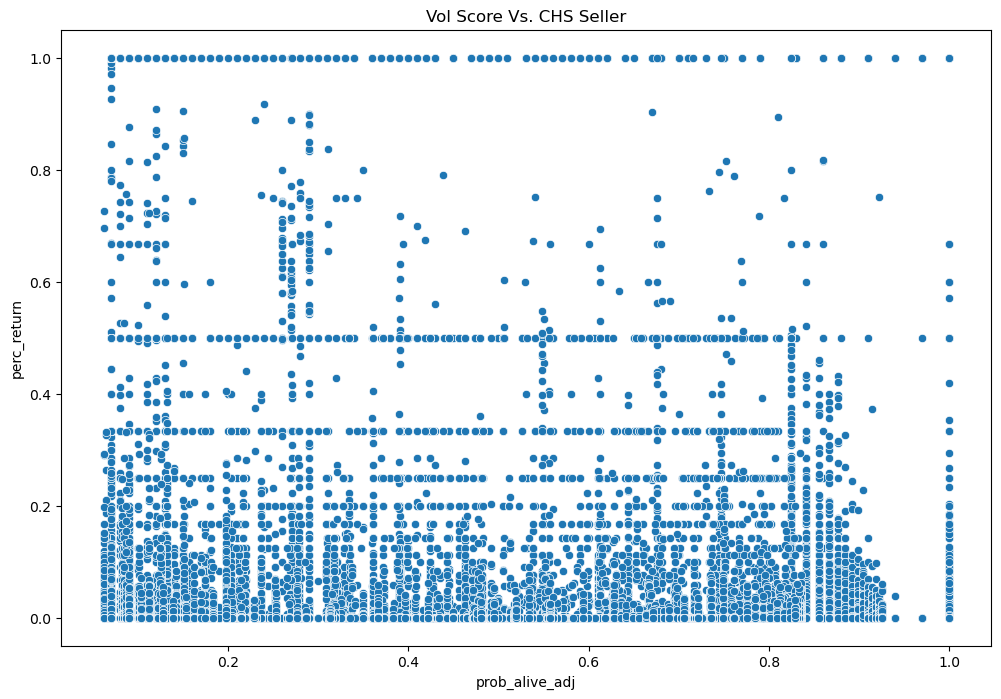

In [22]:
plt.figure(figsize=(12,8))

#Scatterplot
sns.scatterplot(data=seller_score_clean, x='prob_alive_adj', y='perc_return')

#Title 
plt.title(f"Vol Score Vs. CHS Seller")

# x and y axis labels
plt.xlabel(abbr['vol_score_v2'])
plt.ylabel(abbr['prob_alive_adj'])

# #Country names
# for i in range(seller_score.shape[0]):
#           plt.text(hdi_df.gni_pc[i], y=hdi_df.life_ex[i], s=hdi_df.Country[i], alpha=0.8)

#Quadrant Marker          
plt.text(x=40000, y=68, s="Q4",alpha=0.7,fontsize=14, color='b')
plt.text(x=15000, y=68, s="Q3",alpha=0.7,fontsize=14, color='b')
plt.text(x=15000, y=78, s="Q2", alpha=0.7,fontsize=14, color='b')
plt.text(x=40000, y=78, s="Q1", alpha=0.7,fontsize=14, color='b')          

# Benchmark Mean values          
plt.axhline(y=50, color='k', linestyle='--', linewidth=1)           
plt.axvline(x=50, color='k',linestyle='--', linewidth=1) 
          
plt.show()

In [23]:
seller_score_clean.sort_values(by = 'prob_alive_adj', ascending = False)

,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month
344053,Abas BcFjb,3.934702,1.000000,0.000000,37.557556,3.000000,0
144365,ASCO PUSAT,2.479093,1.000000,0.000000,36.611411,2.000000,0
144376,SAMI SAGITA (MSI),1.112274,1.000000,0.000000,35.722978,1.000000,0
18670,Herbalstore093,1.112274,1.000000,0.000000,35.722978,1.000000,0
144402,Arkhi,1.112274,1.000000,0.000000,35.722978,1.000000,0
...,...,...,...,...,...,...,...
612891,Defita_Fashion,47.147215,0.061978,0.000000,32.814903,41.166667,5
615282,Rizkie99_Store,36.819688,0.061978,0.011628,25.520615,28.666667,5
615280,mukena_flutterby,10.742790,0.061978,0.000000,9.152027,7.500000,5
615279,takuka,80.181000,0.061978,0.000000,54.286863,148.833333,5


In [24]:
oid_request_seller = pd.read_csv('oid_request_seller.csv')
seller_score_oid = seller_score_clean.merge(oid_request_seller, how = 'inner', on = 'sender_name')
seller_score_oid

,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month,waybill_source,province,city
0,ICIH,1.112274,0.160000,0.000000,6.322978,1.000000,0,IDV,JAWA BARAT,KARAWANG
1,DIKI AFRIAN,1.112274,0.260000,0.000000,9.822978,1.000000,0,IDV,JAWA BARAT,INDRAMAYU
2,CINDY ANINDYA,1.112274,0.880000,0.000000,31.522978,1.000000,0,IDV,JAWA BARAT,KOTA CIREBON
3,EUIS NUROHIMI,1.112274,1.000000,0.000000,35.722978,1.000000,0,IDV,JAWA BARAT,TASIKMALAYA
4,gibran c,1.112274,0.510000,0.000000,18.572978,1.000000,0,IDV,JAWA BARAT,KOTA CIREBON
...,...,...,...,...,...,...,...,...,...,...
48794,GUDANG SKINCARE BOGOR,4.359764,0.829369,0.000000,31.861771,3.285714,13,IDV,JAWA BARAT,BOGOR
48795,ALVARO COLLECTION/ADM DIRA,39.498182,0.922209,0.000000,57.951150,31.571429,13,IDV,JAWA BARAT,BOGOR
48796,ALVARO COLLECTION/ADM MEGA,68.577147,0.922209,0.004866,76.609168,88.071429,13,IDV,JAWA BARAT,BOGOR
48797,ALVARO COLLECTION/ADM ITA,67.735175,0.922209,0.001676,76.221373,85.214286,13,IDV,JAWA BARAT,BOGOR


In [28]:
seller_score_oid.sort_values(by = ['frequency_month', 'seller_score'], ascending = False)

,sender_name,vol_score_v2,prob_alive_adj,perc_return,seller_score,avg_vol_month,frequency_month,waybill_source,province,city
48796,ALVARO COLLECTION/ADM MEGA,68.577147,0.922209,0.004866,76.609168,88.071429,13,IDV,JAWA BARAT,BOGOR
48797,ALVARO COLLECTION/ADM ITA,67.735175,0.922209,0.001676,76.221373,85.214286,13,IDV,JAWA BARAT,BOGOR
48795,ALVARO COLLECTION/ADM DIRA,39.498182,0.922209,0.000000,57.951150,31.571429,13,IDV,JAWA BARAT,BOGOR
48798,BIGBUM BEKASI,25.386492,0.829369,0.000000,45.529144,18.142857,13,IDV,JAWA BARAT,KOTA DEPOK
48794,GUDANG SKINCARE BOGOR,4.359764,0.829369,0.000000,31.861771,3.285714,13,IDV,JAWA BARAT,BOGOR
...,...,...,...,...,...,...,...,...,...,...
11886,Arena_Sepatu,1.112274,0.070000,1.000000,-46.827022,1.000000,0,IDV,JAWA BARAT,BANDUNG
20425,Khema,1.112274,0.070000,1.000000,-46.827022,1.000000,0,IDV,JAWA BARAT,BANDUNG
27837,MARKAS IMPORT08,1.112274,0.070000,1.000000,-46.827022,1.000000,0,IDV,JAWA BARAT,BANDUNG
28335,VIP SHOP 3 M.H,1.112274,0.070000,1.000000,-46.827022,1.000000,0,IDV,JAWA TENGAH,BANYUMAS
